<center> <h1> Hinglish Classifier </h1> </center>

In [1]:
import re
import os
import keras 
import gensim
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint
%matplotlib inline

Using TensorFlow backend.


In [2]:
data=[]
labels=[]
total_data=[]

# Reading the english doc file
with open('./data/english.txt') as f:
    data = f.readlines()
    labele=np.zeros(len(data), dtype='int8')

    # Reading the hinglish doc file
with open('./data/hinglish.txt') as f:
    data2 = f.readlines()
    data+=data2
    labelh=np.ones(len(data2), dtype='int8')

labels=np.concatenate((labele, labelh), axis=0)
    
# Cleaning out the newline character from the data
for i, word in enumerate(data):
    total_data.append((re.sub("[^a-zA-Z]","",word).lower(),labels[i]))
print(len(total_data))

78244


In [3]:
for i in range(5):
    pprint(total_data[np.random.randint(len(data))])

('kataphoric', 0)
('saltmouth', 0)
('unhospitalized', 0)
('gattine', 0)
('prasiddhi', 1)


In [4]:
np.random.shuffle(total_data)
test = list(total_data[:500])
data = list(total_data[500:])
pprint(test[:10])

[('edinabarga', 1),
 ('ghatit', 1),
 ('nucleclei', 0),
 ('whitworth', 0),
 ('pidhidarpidhi', 1),
 ('imposed', 0),
 ('rikishas', 0),
 ('pulon', 1),
 ('salubrious', 0),
 ('ajit', 1)]


In [51]:
train_x = [a[0] for a in data]
train_y = [a[1] for a in data]
test_x = [a[0] for a in test]
test_y = [a[1] for a in test]

In [52]:
char_set = sorted(set(''.join(train_x)))
print("The character set is: \n",char_set)
longest = max(sorted(test_x, key=len)[-1],sorted(train_x, key=len)[-1])
print("Maximum length word: ",longest)
maxlen = len(longest)
print("Number of characters in longest word ",maxlen)
word_count = len(train_x)
print("Words in the total dataset are %s and in train_x are %s"%(len(total_data), word_count))

The character set is: 
 ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Maximum length word:  trinitrophenylmethylnitramine
Number of characters in longest word  29
Words in the total dataset are 78244 and in train_x are 77744


In [53]:
alpToDig=dict()
digToAlp=dict()
for i,j in enumerate(char_set):
    alpToDig[j]=i+1
    digToAlp[i+1]=j

In [54]:
def process_text(word):
    processed_frame_x=np.zeros((len(word),maxlen,len(char_set)),dtype='int8')
    for sample_index,sample in enumerate(word):
        for char_index, char in enumerate(sample.lower()):
            processed_frame_x[sample_index, char_index-1, alpToDig[char]-1]=1
    return processed_frame_x

In [55]:
train_frame_y = np.array(train_y)
test_frame_y = np.array(test_y)

In [56]:
train_frame_x = process_text(train_x)
test_frame_x = process_text(test_x)

In [57]:
model = keras.models.Sequential()

model.add(keras.layers.LSTM(32, input_shape=(maxlen, len(char_set))))
model.add(keras.layers.Dense(1))
model.add(keras.layers.Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                7552      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 7,585
Trainable params: 7,585
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile( optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_frame_x, train_frame_y,
                    batch_size=64,
                     epochs=10,
                    validation_data=(test_frame_x, test_frame_y),
                       verbose=1)

Train on 77744 samples, validate on 500 samples
Epoch 1/10
77744/77744 [==============================] - 53s 678us/step - loss: 0.3180 - acc: 0.8617 - val_loss: 0.2497 - val_acc: 0.9100
Epoch 2/10
77744/77744 [==============================] - 56s 718us/step - loss: 0.2712 - acc: 0.8880 - val_loss: 0.2231 - val_acc: 0.9160
Epoch 3/10
77744/77744 [==============================] - 65s 832us/step - loss: 0.2491 - acc: 0.8984 - val_loss: 0.2207 - val_acc: 0.9160
Epoch 4/10
77744/77744 [==============================] - 50s 637us/step - loss: 0.2337 - acc: 0.9062 - val_loss: 0.2070 - val_acc: 0.9240
Epoch 5/10
77744/77744 [==============================] - 51s 659us/step - loss: 0.2219 - acc: 0.9120 - val_loss: 0.2084 - val_acc: 0.9040
Epoch 6/10
77744/77744 [==============================] - 60s 771us/step - loss: 0.2149 - acc: 0.9151 - val_loss: 0.1902 - val_acc: 0.9300
Epoch 7/10
77744/77744 [==============================] - 57s 730us/step - loss: 0.2076 - acc: 0.9181 - val_loss: 0.18

In [33]:
model.evaluate(test_frame_x, test_frame_y)

500/500 [==============================] - 0s 754us/step


[0.17429655957221984, 0.9339999995231628]

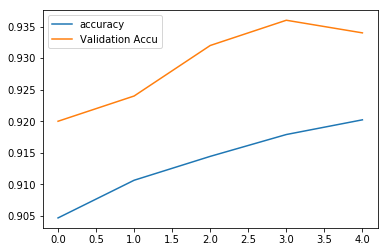

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

hist_dict=history.history
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']
loss = hist_dict['loss']
loss = hist_dict['val_loss']
epochs = [i for i in range(len(acc))]

plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='Validation Accu')
plt.legend()
plt.show()

In [36]:
words = ['Chalo','coffee','peete','hai']
processed_words = process_text(words)
pred = model.predict_classes(processed_words)
for i,p in enumerate(pred):
    if(pred[i]==0):
        print('%s is English'%words[i])
    else:
        print('%s is Hinglish'%words[i])

Chalo is Hinglish
coffee is English
peete is Hinglish
hai is Hinglish


In [37]:
model.save('hinglish_classifier.h5')

In [38]:
!pwd

/media/thanoz/Extended/projects/Hinglish_Clasiifier


In [39]:
from keras import preprocessing as pp

In [48]:
words = gensim.summarization.textcleaner.tokenize_by_word('Hello how are you')
words = [i for i in gensim.summarization.textcleaner.tokenize_by_word('Hello how are you')]
words

['hello', 'how', 'are', 'you']